1- IMPORTAR LIBRERIAS

In [ ]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyarrow in c:\users\operaciones2\appdata\local\programs\python\python312\lib\site-packages (18.1.0)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2- CARGAR DATAFRAME

In [ ]:
data = pd.read_parquet('viajes_taxis_y.parquet')
data.head(3)

,passenger_count,trip_distance,payment_type,day_pickup,hour_pickup,year,mes,duracion del viaje,tarifa - peajes
0,2.0,1.50,1,15,0,2022,1,8.733333,14.16
1,1.0,2.60,1,13,17,2022,1,12.616667,16.30
2,1.0,3.73,1,19,18,2022,1,14.833333,21.36


3- VALIDAR TAMANO DEL DATASET

In [ ]:
data.shape

(21597507, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597507 entries, 0 to 21597506
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   passenger_count     float64
 1   trip_distance       float64
 2   payment_type        int64  
 3   day_pickup          int32  
 4   hour_pickup         int32  
 5   year                int32  
 6   mes                 int32  
 7   duracion del viaje  float64
 8   tarifa - peajes     float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 1.1 GB


4- VALIDAR OUTLIERS EN VARIABLES NUMERICAS

In [ ]:
cols_num = ['trip_distance','duracion del viaje','tarifa - peajes']

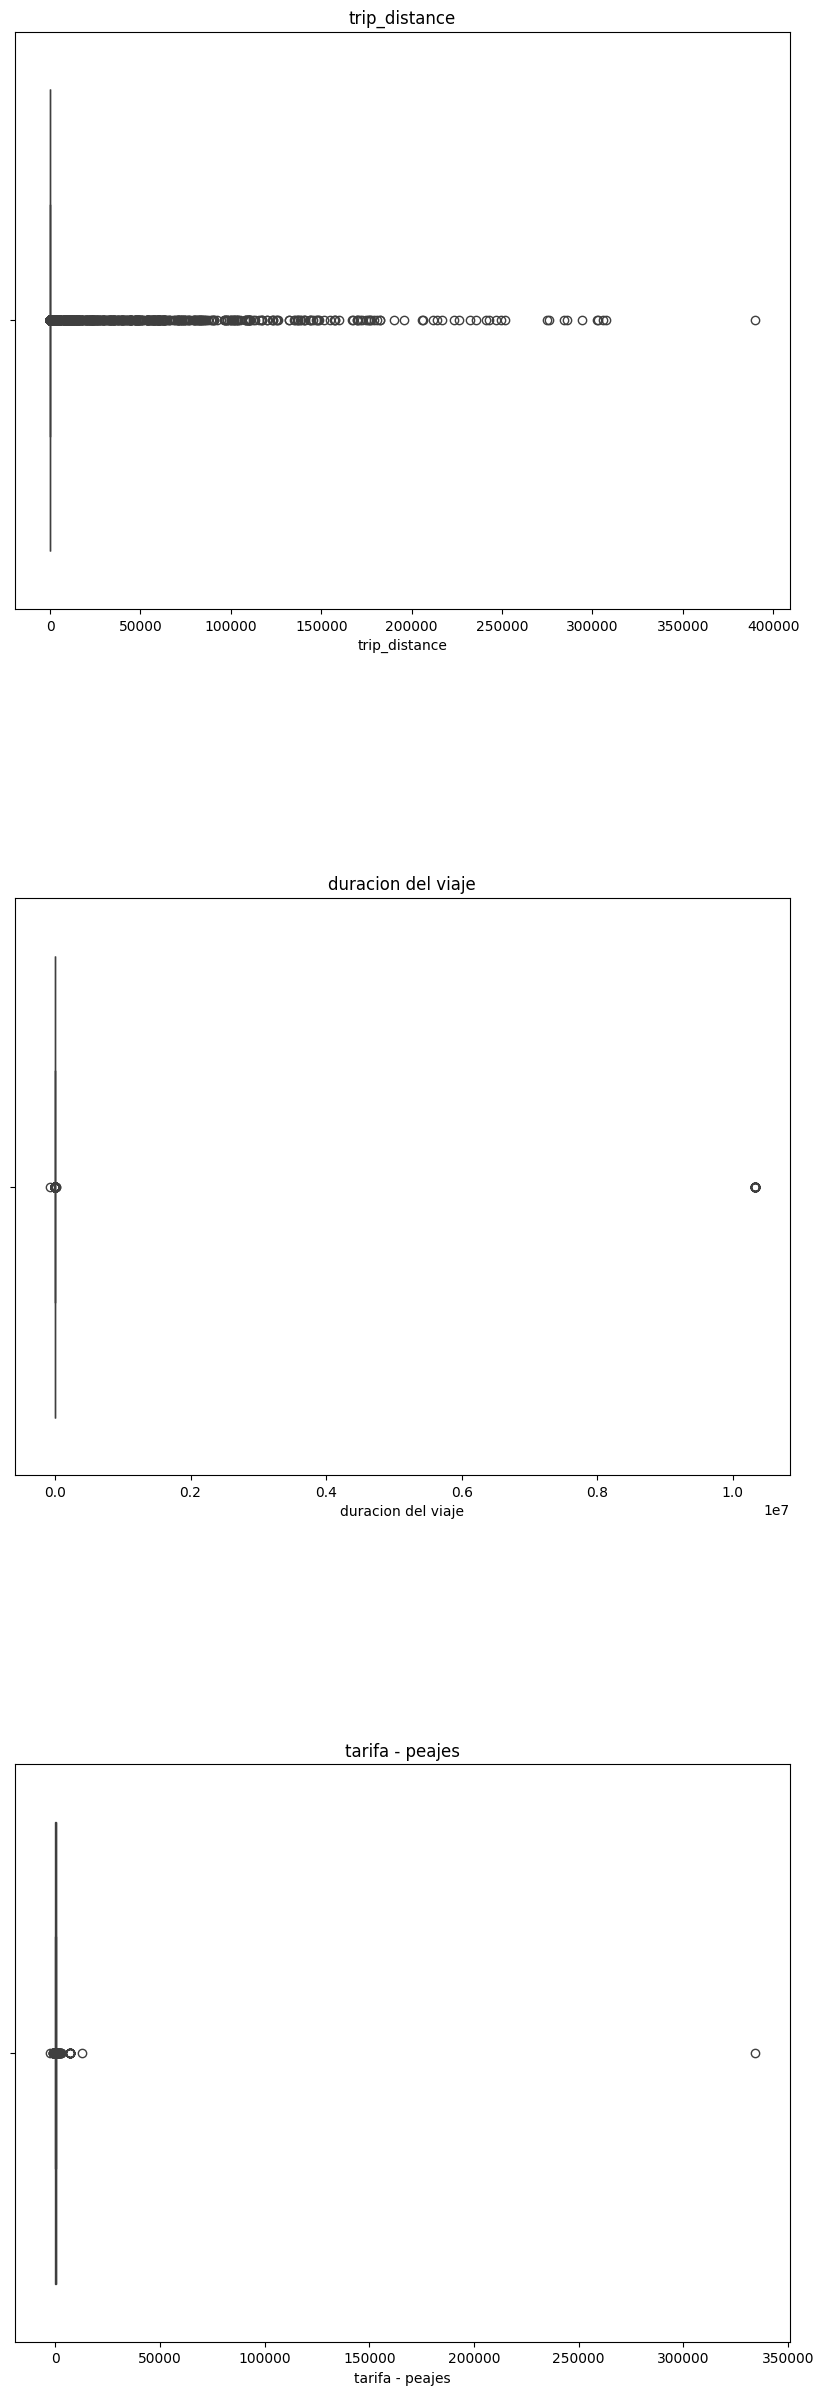

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Comenzamos a validar inicialmente los Outliers en la distancia de los viajes, se observan muchos Outliers alrededor de las 300000 millas, lo cual se ve claramente que son errores de registros,  estableceremos un tope de 13 millas como maximo de recorrido

In [ ]:
print(data['trip_distance'].nlargest(5))
print(data['trip_distance'].nsmallest(5))

5873469    389678.46
6401645    307246.24
6996145    305756.36
5270811    303133.41
7170668    302707.44
Name: trip_distance, dtype: float64
112    0.0
160    0.0
355    0.0
363    0.0
395    0.0
Name: trip_distance, dtype: float64


In [ ]:
print(data['trip_distance'].mean())
print(data['trip_distance'].median())

4.951277135365673
1.8


In [ ]:
data.iloc[5873469]

passenger_count             NaN
trip_distance         389678.46
payment_type               0.00
day_pickup                28.00
hour_pickup                5.00
year                    2022.00
mes                       10.00
duracion del viaje        13.00
tarifa - peajes           18.83
Name: 5873469, dtype: float64

In [ ]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['trip_distance']<=13]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (21597507, 9)
Tamaño del set después de eliminar registros: (20368561, 9)


In [ ]:
print(data['trip_distance'].nlargest(5))
print(data['trip_distance'].nsmallest(5))

8793     13.0
10065    13.0
31694    13.0
37474    13.0
51951    13.0
Name: trip_distance, dtype: float64
112    0.0
160    0.0
355    0.0
363    0.0
395    0.0
Name: trip_distance, dtype: float64


In [ ]:
print(data['trip_distance'].mean())
print(data['trip_distance'].median())

2.5477171632301383
1.7


se validan outliers duracion de viajes

In [ ]:
print(data['duracion del viaje'].nlargest(5))
print(data['duracion del viaje'].nsmallest(5))

3411680    1.032201e+07
3270298    1.032201e+07
3862413    1.032200e+07
3349066    1.032200e+07
3943262    1.032200e+07
Name: duracion del viaje, dtype: float64


1476842    -71759.933333
4786575       -60.500000
7085763       -57.150000
12256165      -57.116667
14855485      -56.600000
Name: duracion del viaje, dtype: float64


In [ ]:
print(data['duracion del viaje'].mean())
print(data['duracion del viaje'].median())

27.474148299757964
11.916666666666666


si observamos los valores mas altos podemos observar que hay tarifas que registran valores como 172000 horas, lo cual son obviamente errores de registros, usando cierta logica vamos a establecer como el tope maximo de duracion de una carrera sean 300 minutos (5 horas)

In [ ]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['duracion del viaje']<=300]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (20368561, 9)
Tamaño del set después de eliminar registros: (20351400, 9)


In [ ]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['duracion del viaje']>=0]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (20351400, 9)
Tamaño del set después de eliminar registros: (20348367, 9)


In [ ]:
print(data['duracion del viaje'].nlargest(5))
print(data['duracion del viaje'].nsmallest(5))

8281709     299.983333
15540127    299.783333
5960404     299.400000
11456342    299.383333
11294563    298.650000
Name: duracion del viaje, dtype: float64
2957     0.0
4286     0.0
4814     0.0
6726     0.0
12551    0.0
Name: duracion del viaje, dtype: float64


In [ ]:
print(data['duracion del viaje'].mean())
print(data['duracion del viaje'].median())


14.202918972973764
11.9


TARIFA - PEAJES, esta metrica corresponde al valor de la tarifa menos los peajes pagados en un solo servicio

In [ ]:
print(data['tarifa - peajes'].nlargest(5))
print(data['tarifa - peajes'].nsmallest(5))


18809775    334145.3
19600089     12903.4
3792408       6983.8
3631356       6981.3
3775116       6976.3
Name: tarifa - peajes, dtype: float64
20553718   -1000.0
20815810   -1000.0
21134945   -1000.0
21303572    -976.0
18027751    -903.5
Name: tarifa - peajes, dtype: float64


In [ ]:
print(data['tarifa - peajes'].mean())
print(data['tarifa - peajes'].median())

21.910273695672995
18.48


Podemos ver unos valores extremos que no corresponden en absoluto con la logica del pago de un serviciode taxi, procederemos a quedarnos con valores inferiores a 1400 USD

In [ ]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['tarifa - peajes']<=1400]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (20348367, 9)
Tamaño del set después de eliminar registros: (20348352, 9)


In [ ]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['tarifa - peajes']>=0]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (20348352, 9)
Tamaño del set después de eliminar registros: (20152058, 9)


In [ ]:
print(data['tarifa - peajes'].nlargest(5))
print(data['tarifa - peajes'].nsmallest(5))

12854403    1120.70
16867508    1021.99
21380550    1000.00
20137938     981.00
19827286     971.00
Name: tarifa - peajes, dtype: float64
1210     0.0
1722     0.0
3261     0.0
9148     0.0
18788    0.0
Name: tarifa - peajes, dtype: float64


In [ ]:
print(data['tarifa - peajes'].mean())
print(data['tarifa - peajes'].median())

22.300096412981706
18.5


Se validan nuevamente como quedan los outlier

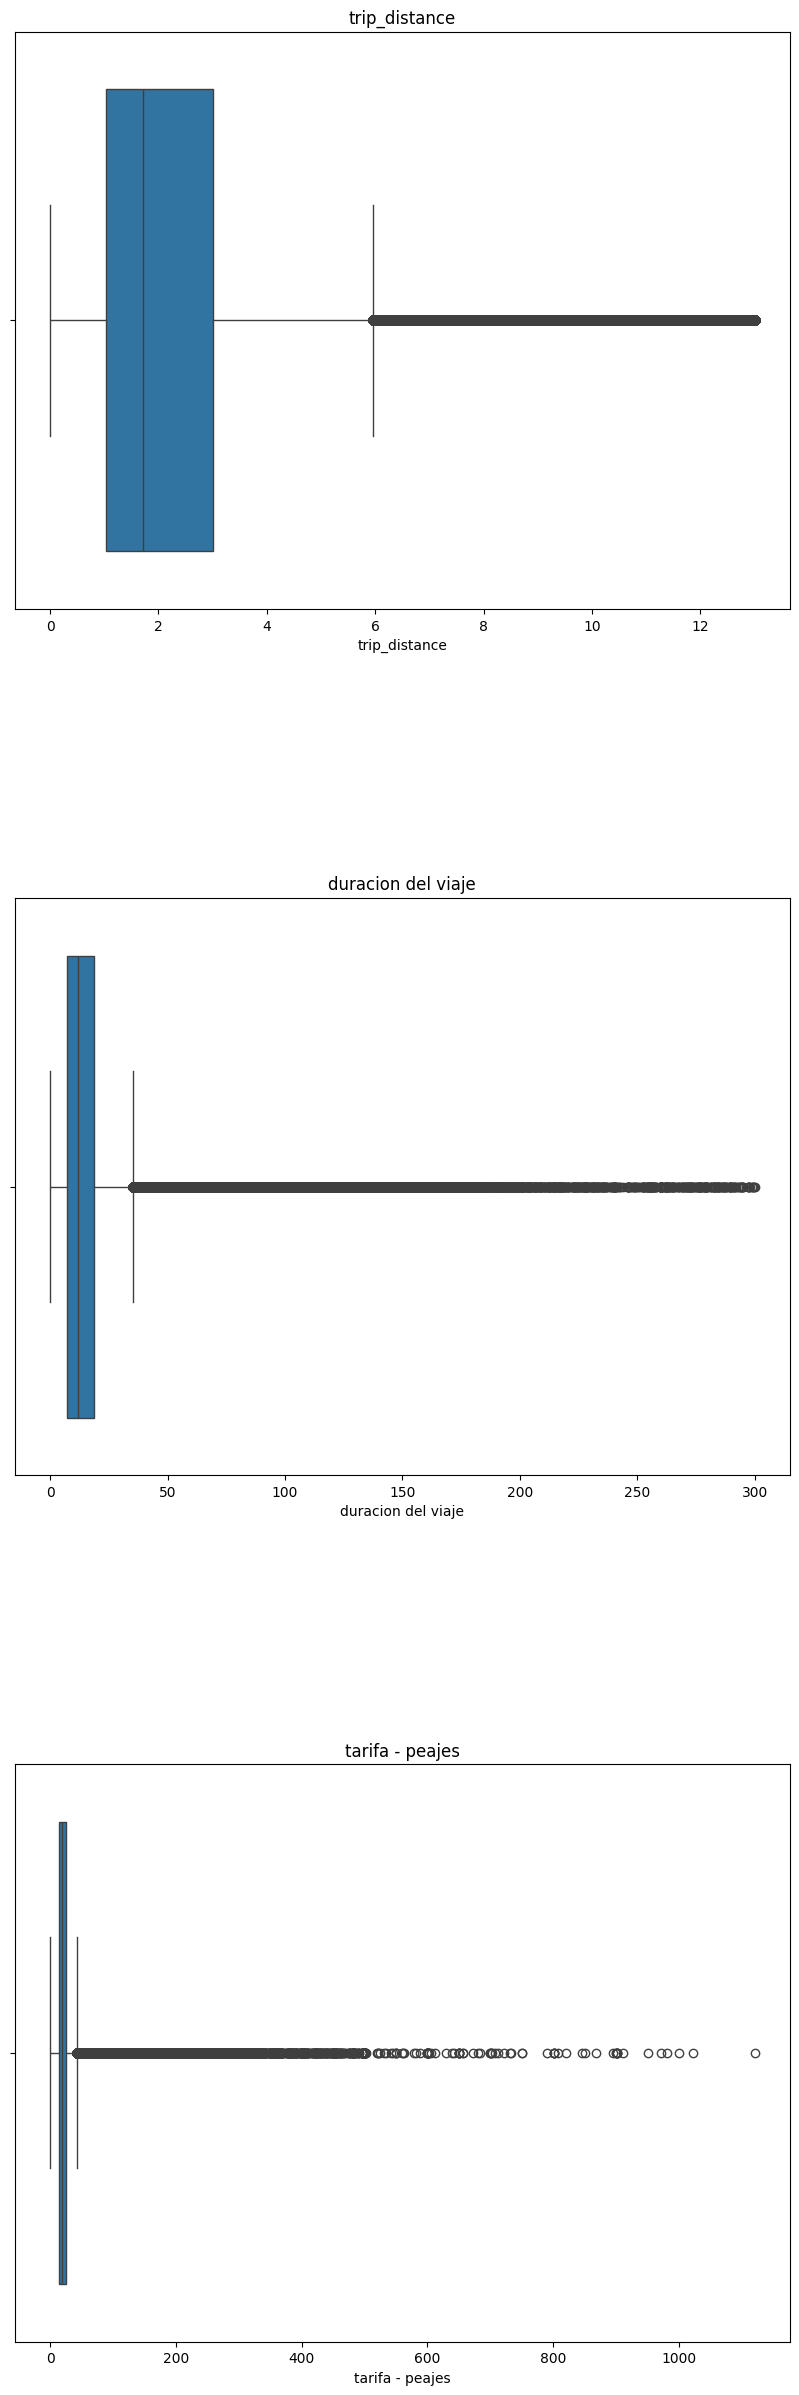

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

A continuación realizaremos la distribución de las variables que vamos a tomar.

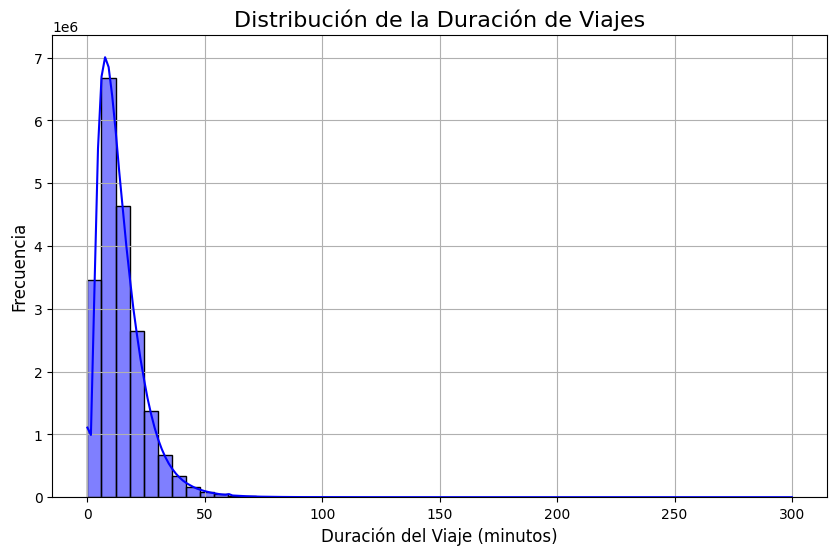

In [ ]:


# Descripción estadística
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['duracion del viaje'], bins=50, kde=True, color='blue')
plt.title('Distribución de la Duración de Viajes', fontsize=16)
plt.xlabel('Duración del Viaje (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

Podemos validar que la distribucion presenta cierto sezgo hacia la derecha, con mayor tendencia de viajes entre los 10 y 20 minutos por viaje

Realizamos la  distribución de la varaible "trip distnace"

count    2.015206e+07
mean     2.552733e+00
std      2.452554e+00
min      0.000000e+00
25%      1.030000e+00
50%      1.710000e+00
75%      3.000000e+00
max      1.300000e+01
Name: trip_distance, dtype: float64


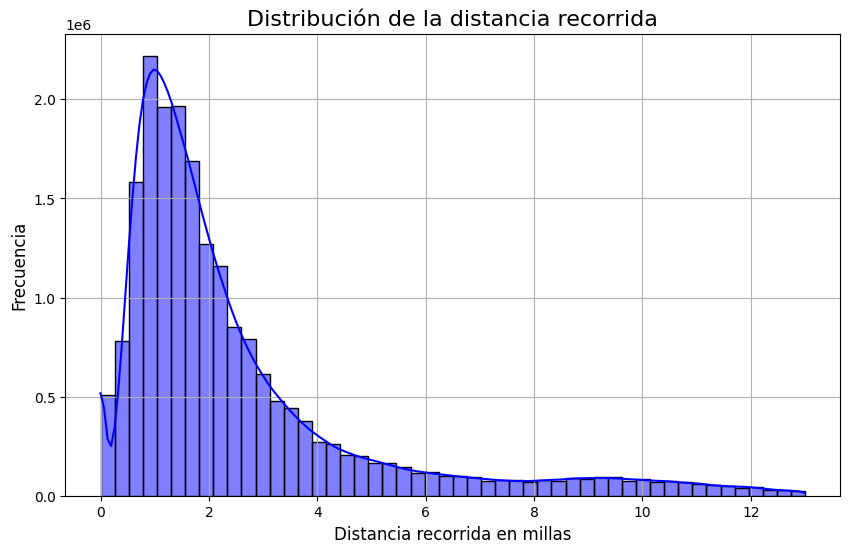

In [ ]:
# Descripción estadística
print(data['trip_distance'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_distance'], bins=50, kde=True, color='blue')
plt.title('Distribución de la distancia recorrida', fontsize=16)
plt.xlabel('Distancia recorrida en millas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()


Se muestra otra grafica con sezgo a la derecha, con mayor tendencia entre 10 y 15 millas por viajes

Realizamos la distribución de la variable tarifas-peajes

count    2.015206e+07
mean     2.230010e+01
std      1.345252e+01
min      0.000000e+00
25%      1.415000e+01
50%      1.850000e+01
75%      2.590000e+01
max      1.120700e+03
Name: tarifa - peajes, dtype: float64


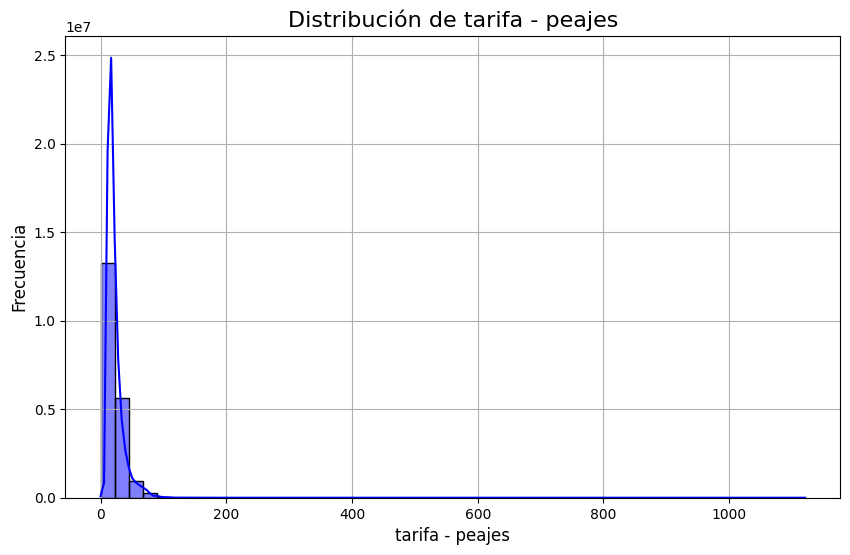

In [ ]:
# Descripción estadística
print(data['tarifa - peajes'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['tarifa - peajes'], bins=50, kde=True, color='blue')
plt.title('Distribución de tarifa - peajes', fontsize=16)
plt.xlabel('tarifa - peajes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

Podemos validar que la mayor frecuencia se observa con montos generados entre los montos entre 18 y 22 dolares por viaje

AHora hacemos la distribución de hour pickup

count    2.015206e+07
mean     1.425563e+01
std      5.799283e+00
min      0.000000e+00
25%      1.100000e+01
50%      1.500000e+01
75%      1.900000e+01
max      2.300000e+01
Name: hour_pickup, dtype: float64


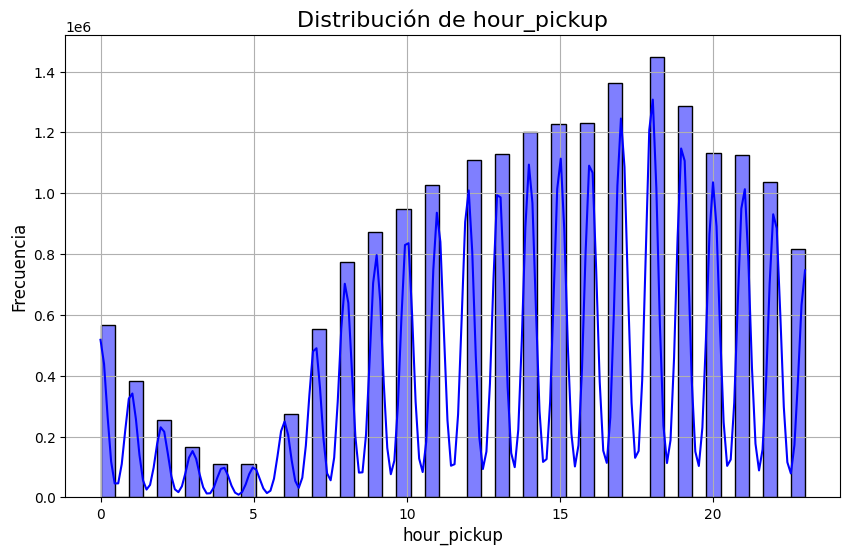

In [ ]:
# Descripción estadística
print(data['hour_pickup'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['hour_pickup'], bins=50, kde=True, color='blue')
plt.title('Distribución de hour_pickup', fontsize=16)
plt.xlabel('hour_pickup', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

En esta grafica se aprecia que la mejor hora de recogida entre las 15 h y 20 h, en especifico la mejor hora para recoger pasajeros son las 18 h, y la hora que menos frecuencia presenta son la 04 h

Distribución day pickup

count    2.015206e+07
mean     1.560492e+01
std      8.717489e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.500000e+01
75%      2.300000e+01
max      3.100000e+01
Name: day_pickup, dtype: float64


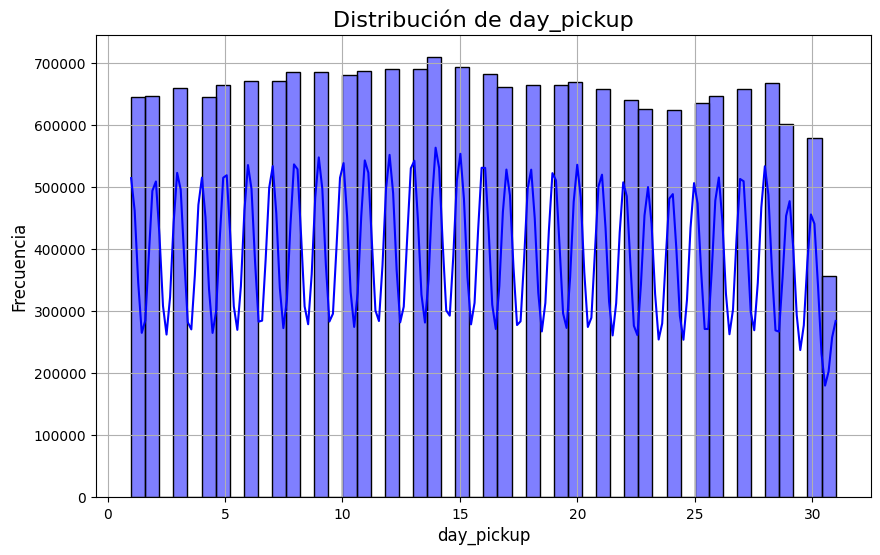

In [ ]:
# Descripción estadística
print(data['day_pickup'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['day_pickup'], bins=50, kde=True, color='blue')
plt.title('Distribución de day_pickup', fontsize=16)
plt.xlabel('day_pickup', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

Aqui podemos apreciar una grafica con tendencia uniforme, con resultados que muestra que todos los dias presentan comportamientos similares, en realidad no se representa una diferencia significativa en cuanto a los dias de recogidas, pero se aprecia una mayor afluencia los dias 14

Distribución de  payment_type

count    2.015206e+07
mean     1.140615e+00
std      5.244362e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: payment_type, dtype: float64


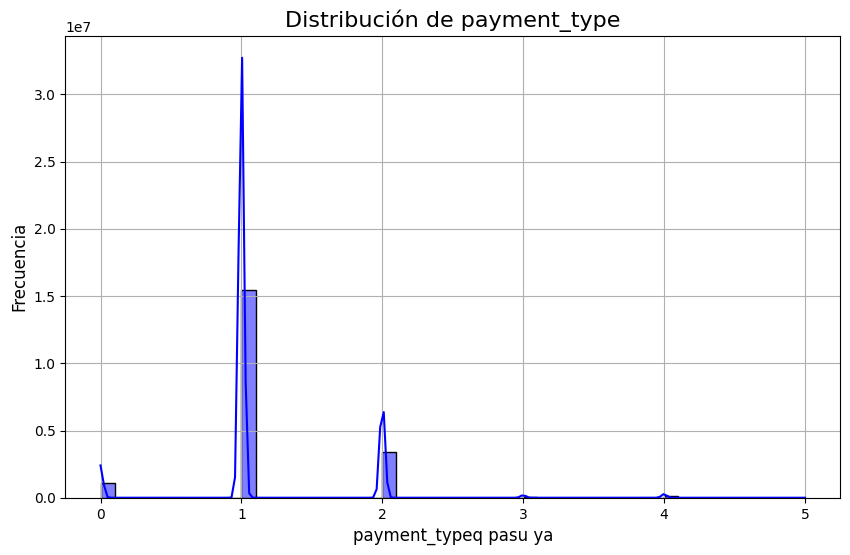

In [ ]:
# Descripción estadística
print(data['payment_type'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['payment_type'], bins=50, kde=True, color='blue')
plt.title('Distribución de payment_type', fontsize=16)
plt.xlabel('payment_typeq pasu ya', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

Enesta graficas tenemos las siguiente premisas 0: tarjeta de credito, 1: efectivo, 2:No charge, 3: Dispute, 4: Unkwown y 5: Voided trip, se aprecia que la mayor frecuencia de viajes se presenta con pagos en efectivo, mas no quiere decir que sea la opcion que genere mas ingresos, esto lo estaremos validando en la relacion con montos por viajes

DISTRIBUCION DE CANTIDAD DE PASAJEROS

1.   Elemento de la lista
2.   Elemento de la lista

POR VIAJE

count    1.905942e+07
mean     1.363363e+00
std      9.008190e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64


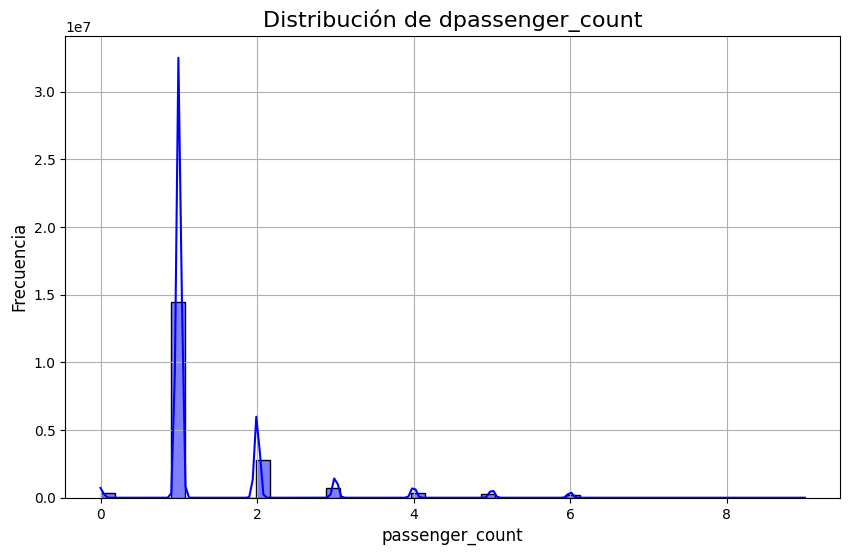

In [ ]:
# Descripción estadística
print(data['passenger_count'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['passenger_count'], bins=50, kde=True, color='blue')
plt.title('Distribución de passenger_count', fontsize=16)
plt.xlabel('passenger_count', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

Aqui podemos apreciar que la mayor distribucion se concentra en viajes de una sola persona

MOSTRAR RELACION ENTRE LA TARIFA NETA Y CANTIDAD DE PASAJEROS EN UN VIAJE

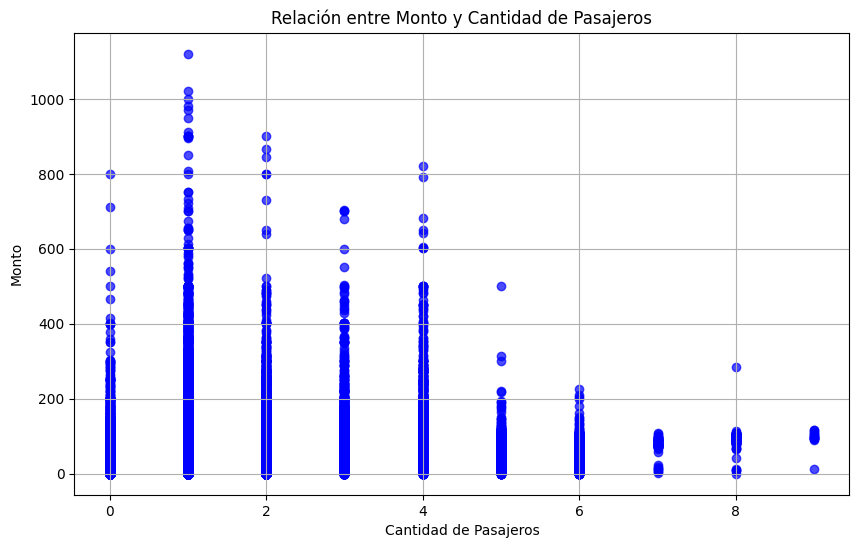

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['passenger_count'], data['tarifa - peajes'], alpha=0.7, color='b')
plt.title('Relación entre Monto y Cantidad de Pasajeros')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Monto')
plt.grid(True)
plt.show()

En este analisis bivariado de cantidad de pasajeros vs monto por carrera podemos observar que los vaiajes que mas generan ingreso por carrera son los de un pasajero, 3 pasajeros y 4 pasajeros

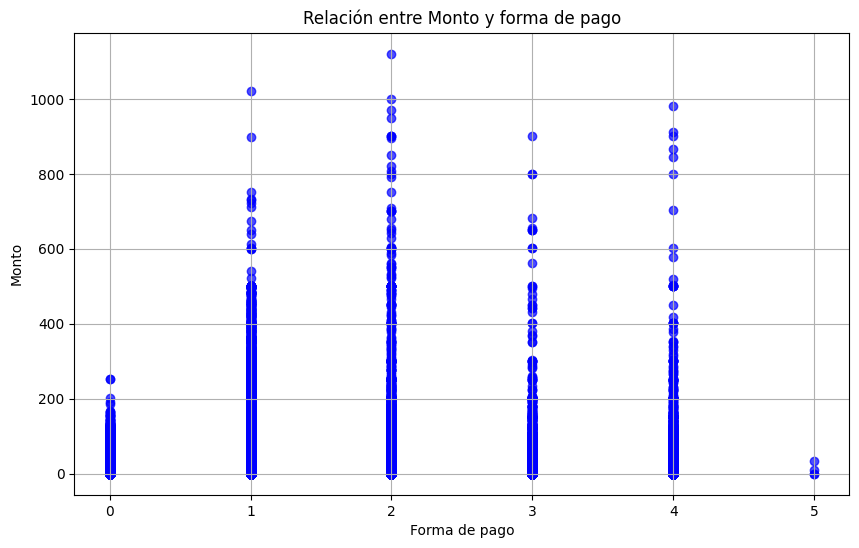

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['payment_type'], data['tarifa - peajes'], alpha=0.7, color='b')
plt.title('Relación entre Monto y forma de pago')
plt.xlabel('Forma de pago')
plt.ylabel('Monto')
plt.grid(True)
plt.show()

la relacion entre forma de pago y los montos se observan comportamientos interesantes, tal como se esperaba los viajes que mas montos generan son los No charge, en segundo lugar Dispute y tercero pagos en efectivo